# Project 2 : Lending Club Loan Data Analysis
By: Syed Sabeel

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Version record used to generate model
import sklearn
print("sklearn version:",sklearn.__version__)
print("Numpy Version:", np.__version__)
print("Tensorflow Verion:", tf.__version__)

sklearn version: 0.24.2
Numpy Version: 1.18.2
Tensorflow Verion: 2.2.0


## Load the dataset and identify the dependent and independent variables
From the given dataset, column "not.fully.paid" is identified as dependent variable and all other features/ columns are independent variable

In [3]:
df=pd.read_csv("loan_data.csv")

## EDA(Exploratory Data Analysis)
There are no missing values in the given dataset

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.shape

(9578, 14)

In [6]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
df.shape

(9578, 14)

#### Feature Engineering-
One Hot Encoding to transform categorical value to numerical value 

In [8]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [9]:
df=pd.get_dummies(df, columns=['purpose'],drop_first=True)

In [10]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


from pandas_profiling import ProfileReport
profile_report_df= ProfileReport(df)
profile_report_df.to_file(output_file='report.html')

#### Correlation of features in dataset
Correlation value lies betweeen -1 & +1, where as 1 means strong positive correlation, -1 means negative correlation and 0 means there is no correlation.

In [11]:
df_corr= df.corr()
df_corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


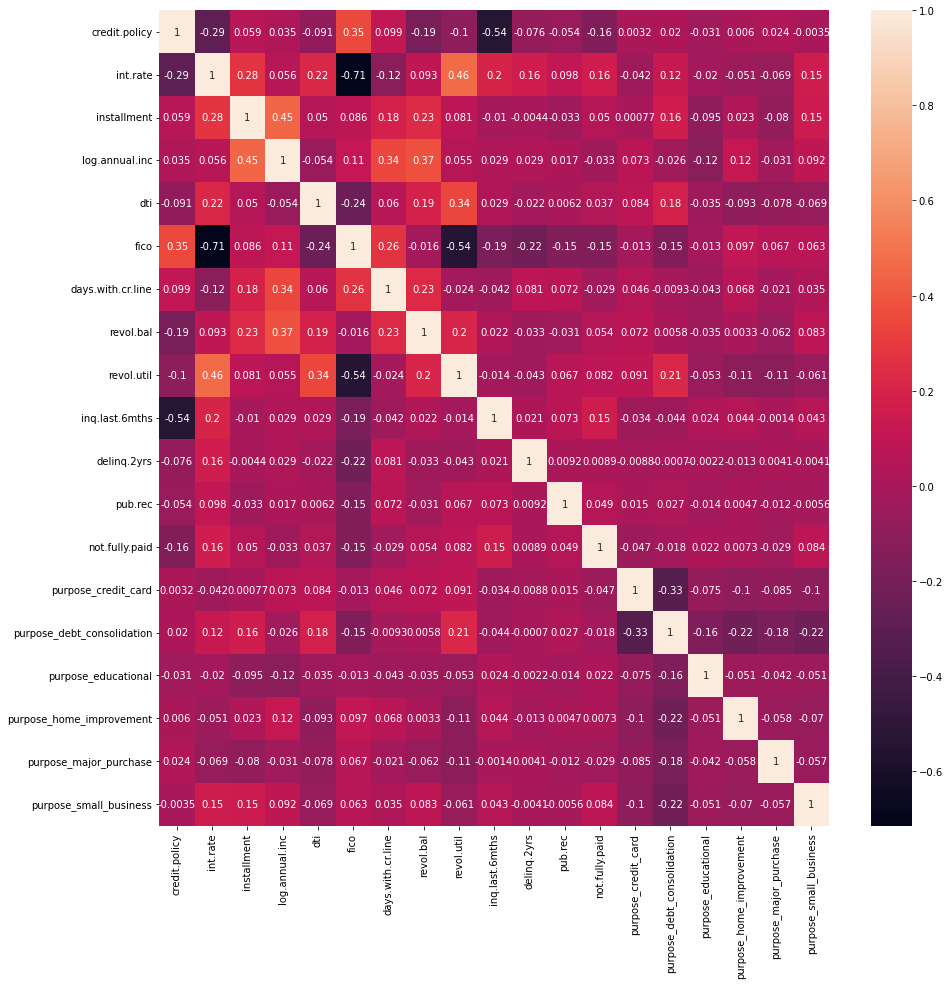

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)
plt.show()

In [ ]:
#sns.pairplot(df,diag_kind='hist',hue="not.fully.paid")

import sweetviz as sv
sweet_report= sv.analyze(df)
sweet_report.show_html('sweet_report.html')

In [13]:
from wordcloud import WordCloud

from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()
DF=AV.AutoViz('loan_data.csv')

In [15]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [16]:
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

#### Feature Importance

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
rf.fit(X,y)
gb.fit(X,y)
print(rf.feature_importances_)
print(gb.feature_importances_)

[0.0159774  0.10522369 0.11629768 0.11014112 0.1101029  0.07775775
 0.11324723 0.1100842  0.11475379 0.05177418 0.01440075 0.00958283
 0.00774346 0.01466888 0.00643375 0.00748553 0.00480161 0.00952324]
[0.13788119 0.15301224 0.11670196 0.09760314 0.03741839 0.06978066
 0.0650147  0.06427055 0.05675749 0.09978319 0.00441699 0.02242546
 0.01189681 0.0148881  0.00101694 0.00352145 0.00216555 0.04144519]


## Create training and test dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
y_train.value_counts()

0    6033
1    1150
Name: not.fully.paid, dtype: int64

#### Imbalance Dataset to perform oversampling using SMOTE(Synthetic Minority Over Sampling Technique)
As observed from the train test split, counts of y_train (0 & 1) is unequally distributed resulting in improper training of model and incorrect output for the test data.
Only training data set is considered for SMOTE in order to validate on test data by increasing the minority count as shown below

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)
X_sm,y_sm=smote.fit_resample(X_train,y_train)

In [21]:
y_sm.value_counts()

1    6033
0    6033
Name: not.fully.paid, dtype: int64

In [22]:
X_sm.shape

(12066, 18)

## Build the Model

In [34]:
# Initialize sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((18,),input_shape=(18,)))

In [35]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [36]:
#Add 1st Hidden Layer
model.add(tf.keras.layers.Dense(3000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [37]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(1200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [38]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(600))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [39]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [40]:
# Add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 18)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 18)                72        
_________________________________________________________________
dense_5 (Dense)              (None, 3000)              57000     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 3000)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3000)              12000     
_________________________________________________________________
dense_6 (Dense)              (None, 1200)              3601200   
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1200)             

In [43]:
# Create Optimizer
sgd_opt = tf.keras.optimizers.SGD(lr=0.1, momentum=0.95, nesterov=True)
# Compile the model
model.compile(optimizer=sgd_opt, loss='binary_crossentropy',metrics=['accuracy'])

## Train the Model

In [46]:
model.fit(X_sm,y_sm,
         validation_data=(x_test,y_test),
         epochs=12,
         batch_size=32)

Epoch 1/12
378/378 [==============================] - 15s 40ms/step - loss: 0.4891 - accuracy: 0.7686 - val_loss: 0.5940 - val_accuracy: 0.7278
Epoch 2/12
378/378 [==============================] - 15s 38ms/step - loss: 0.4822 - accuracy: 0.7730 - val_loss: 0.5780 - val_accuracy: 0.7332
Epoch 10/12
378/378 [==============================] - 15s 39ms/step - loss: 0.4744 - accuracy: 0.7781 - val_loss: 0.6581 - val_accuracy: 0.6868
Epoch 11/12
378/378 [==============================] - 15s 38ms/step - loss: 0.4671 - accuracy: 0.7816 - val_loss: 0.5224 - val_accuracy: 0.7608
Epoch 12/12
378/378 [==============================] - 14s 38ms/step - loss: 0.4769 - accuracy: 0.7819 - val_loss: 0.5616 - val_accuracy: 0.7470


In [45]:
model.save('project2.h5')

#### **********************************************END**********************************************************